# SOLAR III - Solar Flares 

Now that we have explored the Sun's surface, we are going to dive in and focus on one particular solar phenomenon - solar flares!

<div class="alert alert-block alert-info">
    
**GOAL :** In this session we are going to look at solar flare events as light curves in varying wavelengths rather than as images. 

**AIM :** To understand how to access, manipulate and plot time series of solar flare events. 

**OUTPUT :** Create light curves in varying wavelengths of the same flare events using different instruments.
</div>

Solar flares are powerful, eruptive events that are seen across the entire **electromagnetic spectrum**.

![title](EM_spectrum_sun.png)

They result from a build-up of magnetic energy that is converted into kinetic energy, thermal energy, and particle acceleration through **magnetic reconnection**, where the magnetic field simplifies.

![title](magnetic_reconnection.png)

## Geostationary Operational Environmental Satellites (GOES)

Since 1975, the Geostationary Operational Environmental Satellites (GOES) have provided continuous imagery and data on atmospheric conditions and solar activity (space weather). They have even aided in the search and rescue of people in distress. GOES data products have enabled more accurate and timely weather forecasts and a better understanding of long-term climate conditions. GOES is a collaborative National Oceanic and Atmospheric Administration (NOAA) and NASA program where NASA builds and launches the satellites and NOAA operates them.

Over the years there have been 18 GOES satellites launched with three currently in operation. Since March 2020, GOES 15 is no longer taking data and GOES 16 and 17 have taken over with GOES 18 launched in March 2022. These three are part of the GOES-R series and provide XRS data at a better time resolution of one second.

![title](GOES.png)

Large solar flares can change the Earth’s ionosphere, which blocks high-frequency radio transmissions on the sunlit side of the Earth. These events are also associated with Coronal Mass Ejections (CMEs), which can ultimately lead to geomagnetic storms. Some large solar flares are accompanied by strong radio bursts that may interfere with other radio frequencies and cause problems for satellite communication and radio navigation (GPS). 

Therefore, GOES uses its onboard X-Ray Sensors (XRS) to take measurements of solar X-rays in the 1-8 Å (long or xrsb channel) and 0.5-4.0 Å (short or xrsa channel) passbands, which are plotted (see example below) and used to track solar activity and solar flares. They then use these measurements to determine the strength of solar flare events, where thresholds (also called indices) are used by solar physicists to classify them. Flare indices are denoted by a letter and a number based on the log10 peak irradiance of the flare:

- X: 10<sup>-4</sup> W m-2
- M: 10<sup>-5</sup> W m-2
- C: 10<sup>-6</sup> W m-2
- B: 10<sup>-7</sup> W m-2
- A: 10<sup>-8</sup> W m-2

For example, an M5 index is defined for a 5x10-5 W m-2 peak irradiance, and an X2.5 index is defined as an irradiance level of 2.5x10-4 W m-2 peak irradiance. The flare index is defined by the truncated (not rounded) irradiance; e.g., a flare with peak irradiance of 4.19x10-5 Wm-2 is an M4.1 flare, not an M4.2 flare. The Space Weather Prediction Centre at NOAA sends out space weather alerts when flares at the M5 level or above are detected. 

Real-time data from GOES data can be found at this __[link](https://www.swpc.noaa.gov/products/goes-x-ray-flux)__.

![title](goes-x-ray-flux-1-minute.png)

***

### Accessing GOES data using sunpy

Let's first add all the Python packages that we will need.

In [82]:
# some basic packages
import os
import sys
import fnmatch
import numpy as np
import pandas as pd

# solar physics package
import sunpy

# importing plotting packages
import matplotlib.pyplot as plt
from matplotlib import dates

# setting text size for plots
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12

# importing widgets for interactive plots
from ipywidgets import *

For this session, we will be focusing on using sunpy.timeseries to create plots of GOES X-ray data, so we need to import the packages here. 

**Note:** if you have any errors with this, then ask a demonstrator, as you need to have all sunpy packages and their dependencies installed. 

In [83]:
# and some sub packages from sunpy and astropy
from sunpy import timeseries as ts
from sunpy.time import parse_time
from astropy import units as u

There are three ways to access GOES solar time series data.

1. Using __[GOES XRS Near Real Time data]( https://services.swpc.noaa.gov/json/goes/primary/)__, which includes the GOES XRS timeseries data as well as the flare times.
2. Accessing the __[Heliophysics Events Knowledgebase (HEK)](https://www.lmsal.com/hek/index.html)__ catalogue to retreive a list of all solar flare events. 
3. Retrieve the GOES XRS data using __[Fido](https://docs.sunpy.org/en/stable/generated/api/sunpy.net.Fido.html#sunpy.net.Fido)__, which we used earlier for downloading SDO data. 

### Examples
### 1. Accessing GOES Near Real Time Data

The GOES Near Real Time data is accessed using pandas.read_json(). This allows us to download the file and load it directly into a pandas.DataFrame. This file updates every minute and contains the last 7 days worth of data. However, there is a little bit of work to do to get the data into a format which the sunpy.timeseries will accept. 


Download the data:
>`goes_data = pd.read_json("https://services.swpc.noaa.gov/json/goes/primary/xrays-7-day.json")`

The flux values vary between the two channels, so we need to rearrange them into two columns using a pivot table:
>`goes_data = goes_data.pivot(index='time_tag', columns='energy', values='observed_flux')`
>
> `goes_data.rename(columns={'0.05-0.4nm': 'xrsa', '0.1-0.8nm': 'xrsb'}, inplace=True)'`

To make a sunpy.timeseries we need a datetime index, which we can get by parsing the time strings:
> `goes_data.index = parse_time(list(goes_data.index)).datetime`

We also need to have units for each of the flux columns, so we will create a dictionary and map each column to units of 
> `units = dict([("xrsa", u.W / u.m ** 2), ("xrsb", u.W / u.m ** 2)])`

We also need to create a metadata dictionary for the data:
> `meta = dict({"instrument": "GOES X-ray sensor", "measurements": "primary", "type": "quicklook"})`

Now we can create a sunpy.timeseries.TimeSeries by passing in the data, metadata and units:
> `goes_ts = ts.TimeSeries(goes_data, meta, units, source="xrs")`


NOAA also provides the past 7 days of flare event identifications, which we can also download:

> `flare_events = pd.read_json("https://services.swpc.noaa.gov/json/goes/primary/xray-flares-7-day.json")`

## Task III-1
- Using the example above, download and plot the past 7 days of GOES Near Real Time data.
- In your plot, by eye, identify the largest peaks as potential flare events.
- Download the flare event identifications list and identify the five largest flares in the past seven days.
- Overplot the five largest flares onto the GOES timeseries. Does this match what you had previously identified by eye?

### 2. Accessing GOES flare event list

First lets import the Fido package within sunpy we will need.

In [88]:
from sunpy.net import Fido
from sunpy.net import attrs as a

We use Fido to query the __[Heliophysics Events Knowledgebase (HEK)](https://www.lmsal.com/hek/index.html)__ catalogue. We define our event type as a flare (“FL”). We also set up the start and end times over which we will search for flare events. We want a list of events that were detected by GOES between tstart and tend and have a class > M1.0.

>```
>event_type = "FL"
>tstart = "2013/10/28"
>tend = "2013/10/29"
>result = Fido.search(a.Time(tstart, tend),
>                     a.hek.EventType(event_type),
>                     a.hek.FL.GOESCls > "M1.0",
>                     a.hek.OBS.Observatory == "GOES")
>```

The result is returned as a UnifiedResponse, from which we can see a table from one provider is found and returned.

Using this, we only show two columns due there being over 100 columns returned normally.

>`print(result.show("hpc_bbox", "refs"))`

It is also possible to access the HEK results from the `~sunpy.net.fido_factory.UnifiedResponse` by name.

>`hek_results = result["hek"]`

The results returned contain a lot of information, and we may only want to keep some main results, such as start time, end time, peak time, GOES-class, and active region number. 

## Task III-2
- Using Example 2 above, create an up-to-date list of all GOES solar flare events from the past month.
- Filter these results to show key flare properties such as start time, end time, peak time, GOES-class, and active region number.
- Convert the GOES-class to flare energy and sort the flare list from strongest to weakest. 

<div class="alert alert-block alert-warning">
<b>CHECKPOINT 1:</b> Find a demonstrator and show them your GOES plot and flare list before progressing to the next task.
</div>

### 3. Accessing GOES data using Fido

First lets import the Fido package within sunpy we will need.

In [92]:
from sunpy.net import Fido
from sunpy.net import attrs as a

A quick reminder, when searching for data with Fido, you need to specify attributes to search with (similar to what we did with SDO data in the previous session). We will use the following for GOES data:

- use a.Time to specify the data and time in the format 'yyyy/mm/dd hh:mm:ss'

> `e.g. a.Time('2025/10/01 00:00:15', '2025/10/01 00:00:30')`

- use the a.Instrument to specify which instrument you would like (i.e. XRS for GOES data)

> `e.g. a.Instrument("AIA")`

For example, we define our start and end times and query the XRS database using Fido as follows. 

In [93]:
tstart = "2015-06-21 01:00"
tend = "2015-06-21 23:00"
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

6 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        Instrument  Physobs   Source Provider Resolution SatelliteNumber filename_res
----------------------- ----------------------- ---------- ---------- ------ -------- ---------- --------------- ------------
2015-06-21 00:00:00.000 2015-06-21 23:59:59.999        XRS irradiance   GOES     NOAA      irrad              13         gxrs
2015-06-21 00:00:00.000 2015-06-21 23:59:59.999        XRS irradiance   GOES     NOAA      avg1m              13         xrsf
2015-06-21 00:00:00.000 2015-06-21 23:59:59.999        XRS irradiance   GOES     NOAA      irrad              14         gxrs
2015-06-21 00:00:00.000 2015-06-21 23:59:59.999        XRS irradiance   GOES     NOAA      a

This returns six results, two files for each of GOES 13, GOES 14 and GOES 15, which can be identified by the `SatelliteNumber` column. The GOES data provided can either be high-cadence (1s/2s/3s based on GOES satellite) or averaged over 1 minute. This can be noted in the Resolution column, where the `avg1m` and `flx1s` attributes are the 1 minute average and the high-cadence data, respectively. 

However, we only want one of these files for our analysis, so we filter our query further using the following attributes:

- use a.goes.SatelliteNumber to specify what GOES satellite number you want to use (see notes at beginning)
> `e.g a.goes.SatelliteNumber(15)`

- use a.Resolution to specify the resolution (or cadence) of the observations (see notes at beginning)
> `e.g a.Resolution("flx1s")`

We can now refine our Fido query to specify the GOES-15 satellite and use the high-cadence observations.

In [94]:
result_goes15 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(15), a.Resolution("flx1s"))
print(result_goes15)

Results from 1 Provider:

1 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        Instrument  Physobs   Source Provider Resolution SatelliteNumber filename_res
----------------------- ----------------------- ---------- ---------- ------ -------- ---------- --------------- ------------
2015-06-21 00:00:00.000 2015-06-21 23:59:59.999        XRS irradiance   GOES     NOAA      irrad              15         gxrs




Now download this data using fetch.

In [95]:
file_goes15 = Fido.fetch(result_goes15, path='/Users/u1973287/OneDrive - University of Warwick/Outreach/ThaiPASS/data/III_data/{file}')

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Now let's load this data into a TimeSeries, and inspect the data using peek().

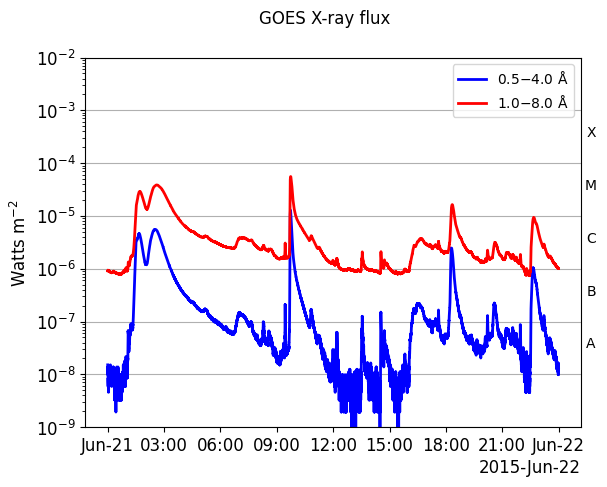

In [96]:
goes_15 = ts.TimeSeries(file_goes15)
goes_15.peek()

GOES quality flags can be used to filter GOES data. These tell us about the quality of the data and remove any data points which may have instrumental issues with pointing or calibration.

In [97]:
df = goes_15.to_dataframe()
df = df[(df["xrsa_quality"] == 0) & (df["xrsb_quality"] == 0)]
goes_15 = ts.TimeSeries(df, goes_15.meta, goes_15.units)

We can also pull out the individual GOES channels and plot them separately.

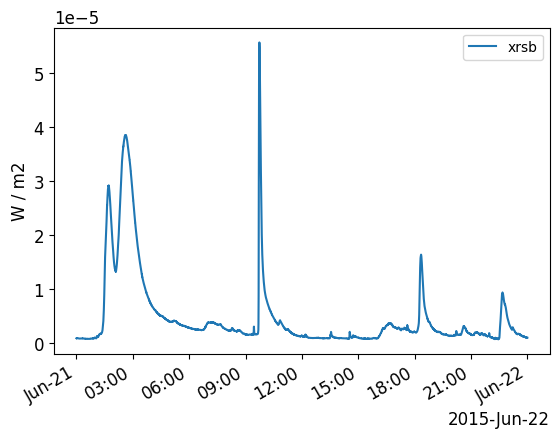

In [98]:
fig, ax = plt.subplots()
goes_15.plot(axes=ax, columns=["xrsb"])
plt.show()

## Task III-3
Using the GOES flare list created in the previous task:
- Identify **three** solar flare events and plot their corresponding GOES light curve in the 1-8 Å channel, accessing the data using Fido. (**Tip:** you may want to plot ones of varying magnitude, i.e. X, M and C.)
- On each plot, add vertical dashed lines with the flare start, end and peak time. 

<div class="alert alert-block alert-warning">
<b>CHECKPOINT 2:</b> Find a demonstrator and show them your GOES light curves before progressing to the next task.
</div>

***

## Extreme ultraviolet Variability Experiment (EVE)

The Extreme ultraviolet Variability Experiment (EVE) is the third instrument on board the Solar Dynamics Observatory (SDO). EVE records the Sun’s extreme ultraviolet (EUV) radiation — light with very short wavelengths (roughly 0.1 to 105 nm) that we cannot see with our eyes. EUV radiation comes from the Sun’s hot upper atmosphere (the corona) and changes quickly during solar flares and other magnetic activity. Even small changes in EUV output can strongly affect Earth’s upper atmosphere, ionosphere, and satellite communications.

What makes EVE special:
- It takes measurements every 10 seconds, so it can follow rapid solar events in detail.
- It provides a full EUV spectrum — allowing scientists to study how different layers of the solar atmosphere respond during flares.
- Its continuous, high-cadence data set is one of the most complete records of solar EUV variability we have.

By using EVE data, you can directly see how solar flares brighten the EUV spectrum and compare this behaviour with soft X-ray data from the GOES satellites. This helps build a picture of how solar activity is detected across different wavelengths.

### Accessing EVE data using SunPy

This is done using Fido, same as above for GOES data, but the instrument should be changed to `a.Instrument("EVE")`. We also want to focus on the level 1 data, which can be filtered using the `a.Level.one` attribute. 

In the EVE/ESP broadband Level-1 data product:
- –1 values are fill values inserted whenever the instrument has no valid measurement (e.g. during eclipses, spacecraft manoeuvers, or bad packets).
- They aren’t real negative irradiances — they’re just placeholders that mean “ignore this data point”.

Therefore, we need to clean these out. You can use the `df = ts.to_dataframe()` command to convert the timeseries to a Pandas dataframe, filter the data to remove all -1 values and convert to nan, then put it back into a timeseries.


## Task III-4
- For the three identified flares in Task III-3, download the corresponding EVE data, clean it, then place it into a timeseries the create a plot. 

When looking at your plots, you will notice there is data present from different channels. The Extreme ultraviolet Spectro-Photometer (ESP) is an irradiance instrument which is part of EVE on board SDO. ESP provides high time cadence (0.25s) EUV irradiance measurements in five channels, one soft X-ray and 4 EUV as follows:
- ‘QD’ - sum of 4 quad diodes, this is the soft X-ray measurements 0.1-7nm
- ‘CH_18’ - EUV irradiance 18nm
- ‘CH_26’ - EUV irradiance 26nm
- ‘CH_30’ - EUV irradiance 30nm
- ‘CH_36’ - EUV irradiance 36nm

Each channel is stored as a separate column. Column names may vary; therefore, we can list them within the EVE timeseries for inspection using: 

>`eve_cols = [c for c in eve_ts.columns if isinstance(c, str)]`

## Task III-5
- For one of the flare events, plot each of the EVE ESP channels in a separate subplot so they can be seen more clearly.
- Make sure there are axis labels and a title.

**Tip:** you can use timeseries or a dataframe

<div class="alert alert-block alert-warning">
<b>CHECKPOINT 3:</b> Find a demonstrator and show them your EVE light curves before progressing to the next task.
</div>

### Comparing GOES and EVE solar flare light curves

The example code below normalises the GOES and EVE timeseries so they can be easily plotted together on one plot. 

In [ ]:
def normalize(s):
    # function to normalise data.
    arr = np.array(s, dtype=float)
    return (arr - np.nanmin(arr)) / (np.nanmax(arr) - np.nanmin(arr) + 1e-15)

## Task III-6
- Select one solar flare event and create a GOES and EVE light curve comparisson plot. 

## Task III-7
- Does EVE peak earlier or later than GOES? What might that suggest about flare heating and emission at different wavelengths?
- How does the shape of the EVE curve compare to GOES (sharper rise, slower decay)?

<div class="alert alert-block alert-warning">
<b>CHECKPOINT 4:</b> Find a demonstrator and discuss your GOES/EVE comparisson with them. 
</div>